## SHOPIFY SUMMER 2022 DATA SCIENCE INTERN CHALLENGE

Question 1: Given some sample data, write a program to answer the following:

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

a. Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

b. What metric would you report for this dataset?

c. What is its value?


In [92]:
import pandas as pd

In [93]:
df = pd.read_csv("/Users/abhishekmathur/Downloads/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,Unnamed: 7,Unnamed: 8
0,1,53,746,224,2,cash,2017-03-13 12:36:56,NaN,NaN
1,2,92,925,90,1,cash,2017-03-03 17:38:52,NaN,NaN
2,3,44,861,144,1,cash,2017-03-14 4:23:56,NaN,NaN
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,NaN,NaN
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,NaN,NaN
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,NaN,NaN
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,NaN,NaN
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,NaN,15725640.0


In [94]:
df.drop("Unnamed: 7", axis='columns',inplace = True)

In [95]:
df.drop("Unnamed: 8", axis='columns',inplace = True)

In [96]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [97]:
df.describe()  # It gives the summary

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


In [98]:
df.dtypes

order_id           int64
shop_id            int64
user_id            int64
order_amount       int64
total_items        int64
payment_method    object
created_at        object
dtype: object

In [99]:
df.isna()   

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False


In [100]:
df2 = df.isnull().sum().to_frame()
df2.columns = ["total_null_values"]
df2                                     # No null values

,total_null_values
order_id,0
shop_id,0
user_id,0
order_amount,0
total_items,0
payment_method,0
created_at,0


In [101]:
df.order_amount.mean()

3145.128

In [166]:
# df1 = (df[df.shop_id == 78].order_amount)/100

In [167]:
# df.groupby(["shop_id" == 78]).replace(df.order_amount,(df.order_amount/100))
# df.groupby(["shop_id" == 78])["order_amount"].transform(lambda x: x/100))

In [105]:
df["orders_to_one"] = df["order_amount"] / df["total_items"]
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,orders_to_one
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0


In [114]:
df.groupby(df['shop_id'])['orders_to_one'].mean().reset_index().sort_values(by=['orders_to_one'],ascending = False)

,shop_id,orders_to_one
77,78,25725.0
41,42,352.0
11,12,201.0
88,89,196.0
98,99,195.0
...,...,...
52,53,112.0
99,100,111.0
31,32,101.0
1,2,94.0


(array([4.972e+03, 1.000e+01, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.700e+01]),
 array([9.00000e+01, 7.04810e+04, 1.40872e+05, 2.11263e+05, 2.81654e+05,
        3.52045e+05, 4.22436e+05, 4.92827e+05, 5.63218e+05, 6.33609e+05,
        7.04000e+05]),
 <BarContainer object of 10 artists>)

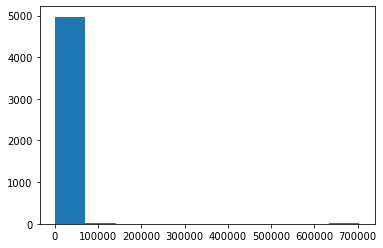

In [116]:
import matplotlib.pyplot as plt
plt.hist(df['order_amount'])

In [132]:
df["total_items"].value_counts()

2       1832
1       1830
3        941
4        293
5         77
2000      17
6          9
8          1
Name: total_items, dtype: int64

It shows that 2000 items/order are sold 17 times

#### Which store is selling 2000 items/ order?

In [118]:
df[df["total_items"] == 2000]["shop_id"].unique()

array([42])

Is Shop 42 selling huge amount to everyone or any customer wanted that much amount of items?

In [140]:
df[df['shop_id'] == 42].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,orders_to_one
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39,352.0
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58,352.0


In [120]:
df[df['user_id'] == 607].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,orders_to_one
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0


It shows that user 607 is demanding huge amount of items each time

We will get a better data to get AOV by 2 ways:
1. if we remove the shop 42 and 78
2. if we remove shop 78 and customer 607

#### 1. Removing shop 42 and shop 78 data

In [121]:
df_new = df[(df["shop_id"] != 42) & (df["shop_id"] != 78)]

In [126]:
df_new["total_items"].mean()

1.9957169080155006

In [127]:
df_new["order_amount"].mean()   # New AOV

300.1558229655313

#### 2. Removing shop 78 and customer 607 data

In [149]:
df_new2 = df[(df["shop_id"] != 78) & (df["user_id"] != 607)]
df_new2.isnull().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
orders_to_one     0
dtype: int64

In [154]:
df_new2["order_amount"].mean()   # New AOV

302.58051448247926

AOV from step 2 (i.e. $302.58) is more accurate as we have more data in this step to calculate AOV

### METRICS

In [155]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

Standard deviation is very high because of the anomalies in the dataset.
Hence, calculating z-score

In [159]:
df['z_score'] = (df['order_amount'] - 3145.128) / 41282.539349
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,orders_to_one,z_score
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0,-0.070759
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0,-0.074005
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0,-0.072697
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0,-0.072407
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0,-0.072407
...,...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0,-0.068192
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0,-0.070517
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0,-0.067683
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0,-0.067610


In [160]:
df[df['z_score'] > 0.2].head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,orders_to_one,z_score
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0,16.977029
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0,16.977029
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0,0.546959
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0,1.170104
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0,1.170104


In [165]:
df[df['z_score'] > 0.2]['shop_id'].unique()

array([42, 78])

Shop 78 and 42 have anomalies as they are far from the mean as compared to others.